In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [47]:
data = pd.read_csv('images.csv')

In [48]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
data.groupby('label', as_index=False) \
    .agg({'pixel0': 'count'}) \
    .rename(columns={'pixel0': 'count'})

,label,count
0,0,4132
1,1,4684
2,2,4177
3,3,4351
4,4,4072
5,5,3795
6,6,4137
7,7,4401
8,8,4063
9,9,4188


In [50]:
X = data.drop(columns='label')
y = data['label']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
X_y_train = X_train.copy(deep=True)
X_y_train['y'] = y_train

In [53]:
def print_image(image_flat, ax=None):
    image = image_flat.reshape(28, 28).astype('uint8')
    
    if ax is None:
        plt.imshow(image)
    else:
        ax.axis('off')
        ax.imshow(image)

In [54]:
X_y_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
39317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
32837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
16644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
20005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
32103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
21243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


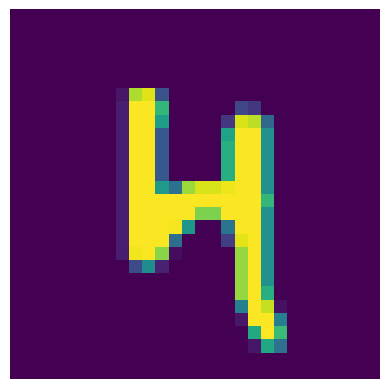

In [55]:
print_image(X_y_train.values[2, :-1], ax=plt)

In [56]:
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,...,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.0,33600.0,33600.0,33600.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.227827,0.130268,0.064226,0.021429,0.021548,0.003571,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.578347,4.818621,3.437205,1.839529,2.118097,0.463160,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [57]:
description = X_train.describe()

<Axes: >

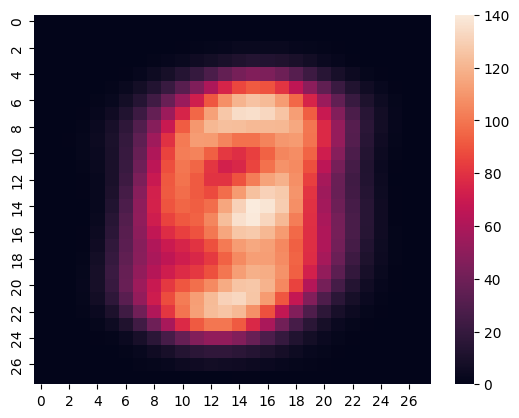

In [58]:
sns.heatmap(pd.DataFrame(description.loc['mean'].values.reshape(28, 28).round(2)))

<Axes: >

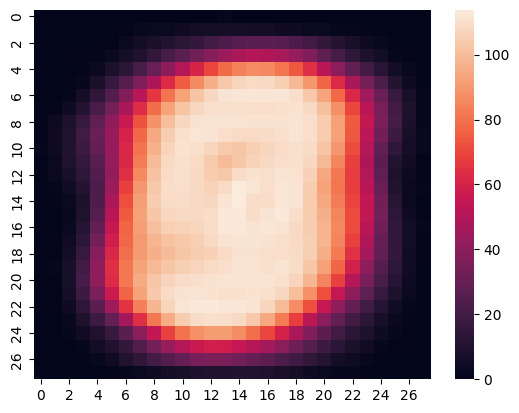

In [59]:
sns.heatmap(pd.DataFrame(description.loc['std'].values.reshape(28, 28).round(2)))

In [60]:
selector = VarianceThreshold(threshold=0).fit(X_train)

In [61]:
len(X_train.columns)

784

In [62]:
len(selector.transform(X_train)[0])

697

In [63]:
len(selector.get_feature_names_out())

697

In [64]:
X_train = X_train[selector.get_feature_names_out()]

In [65]:
X_train

,pixel12,pixel13,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779
39317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [67]:
model_random_forest_100 = RandomForestClassifier(n_estimators=100,max_features=int(len(list(X_train.columns)) ** (1/2)))

In [68]:
model_random_forest_100.fit(X_train, y_train)

RandomForestClassifier(max_features=26)

In [69]:
model_random_forest_100.score(X_train, y_train)

1.0

In [70]:
model_random_forest_100.score(X_val, y_val)

0.9620535714285714

In [71]:
y_pred = model_random_forest_100.predict(X_val)

In [72]:
precision_score(y_val, y_pred, average='micro')

0.9620535714285714

In [73]:
precision_score(y_val, y_pred, average='macro')

0.9619556281355888

In [39]:
mac=0
factors=[0,0]
for mss in range(2,15):
        for msl in range(1,15):
            model = RandomForestClassifier(n_estimators=20, min_samples_split=mss, min_samples_leaf=msl, max_features=int(len(list(X_train.columns)) ** (1/2)), random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            acc=accuracy_score(y_val, y_pred)
            if acc>mac:
                print(acc,factors)
                mac=acc
                factors=[mss,msl]

0.9517857142857142 [0, 0]
0.9526785714285714 [2, 1]
0.952827380952381 [7, 1]


In [40]:
print(mac,factors)

0.952827380952381 [8, 2]


In [74]:
model2 = RandomForestClassifier(n_estimators=100, min_samples_split=8, min_samples_leaf=2, max_features=int(len(list(X_train.columns)) ** (1/2)), random_state=42).fit(X_train, y_train)
model2.score(X_val, y_val)

0.9607142857142857